In [28]:
from socceraction.data.wyscout import PublicWyscoutLoader
from socceraction.spadl.wyscout import convert_to_actions
from socceraction.spadl.config import actiontypes, bodyparts
import socceraction.spadl as spadl

In [29]:
api = PublicWyscoutLoader(root="data/wyscout")

In [30]:
# Competitions Input
competitions_df = api.competitions()
competitions_df.head()

,competition_id,season_id,country_name,competition_name,competition_gender,season_name
0,524,181248,Italy,Italian first division,male,2017/2018
1,364,181150,England,English first division,male,2017/2018
2,795,181144,Spain,Spanish first division,male,2017/2018
3,412,181189,France,French first division,male,2017/2018
4,426,181137,Germany,German first division,male,2017/2018


In [31]:
# Games Input (Competition_id, Season_id)
games_england_df = api.games(364, 181150)
games_england_df.tail()

,game_id,competition_id,season_id,game_date,game_day,home_team_id,away_team_id
375,2499723,364,181150,2017-08-12 14:00:00,1,1623,1639
376,2499726,364,181150,2017-08-12 14:00:00,1,1619,10531
377,2499728,364,181150,2017-08-12 14:00:00,1,1627,1659
378,2499727,364,181150,2017-08-12 11:30:00,1,1644,1612
379,2499719,364,181150,2017-08-11 18:45:00,1,1609,1631


In [32]:
# Teams Input (game_id)
teams_england_df = api.teams(2499726)
teams_england_df.head()

,team_id,team_name_short,team_name
0,10531,Swansea City,Swansea City AFC
1,1619,Southampton,Southampton FC


In [33]:
# Player Input (game_id)
players_df = api.players(2499726)
players_df.head()

,player_id,nickname,firstname,lastname,birth_date,player_name,team_id,jersey_number,minutes_played,is_starter,game_id
0,77550,L. Britton,Leon,Britton,1982-09-16,Leon Britton,10531,0,75,True,2499726
1,343951,T. Abraham,Tammy,Abraham,1997-10-02,Tammy Abraham,10531,0,82,True,2499726
2,77557,W. Routledge,Wayne,Routledge,1985-01-07,Wayne Routledge,10531,0,87,True,2499726
3,246866,A. Mawson,Alfie,Mawson,1994-01-19,Alfie Mawson,10531,0,94,True,2499726
4,8976,T. Carroll,Tom,Carroll,1992-05-28,Tom Carroll,10531,0,94,True,2499726


In [34]:
# Events Input (game_id)
event_england_df = api.events(2499726)
event_england_df.head()

,event_id,game_id,period_id,milliseconds,team_id,player_id,type_id,type_name,subtype_id,subtype_name,positions,tags
0,178218751,2499726,1,506.969,10531,77557,8,Pass,85,Simple pass,"[{'y': 51, 'x': 49}, {'y': 49, 'x': 30}]",[{'id': 1801}]
1,178218752,2499726,1,2281.237,10531,77550,8,Pass,85,Simple pass,"[{'y': 49, 'x': 30}, {'y': 28, 'x': 30}]",[{'id': 1801}]
2,178218753,2499726,1,4066.574,10531,246866,8,Pass,85,Simple pass,"[{'y': 28, 'x': 30}, {'y': 71, 'x': 24}]",[{'id': 1801}]
3,178218754,2499726,1,6515.098,10531,21164,8,Pass,85,Simple pass,"[{'y': 71, 'x': 24}, {'y': 96, 'x': 32}]",[{'id': 1801}]
4,178218755,2499726,1,8587.495,10531,8336,8,Pass,85,Simple pass,"[{'y': 96, 'x': 32}, {'y': 74, 'x': 38}]",[{'id': 1802}]


In [35]:
# Convert Wyscout to SPADL Format 
spadl_events_england_df = convert_to_actions(event_england_df, 1619)
spadl_events_england_df.head()

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id
0,2499726,1,0.506969,10531,77557,53.55,34.68,73.5,33.32,178218751,0,0,1,0
1,2499726,1,2.281237,10531,77550,73.50,33.32,73.5,19.04,178218752,0,0,1,1
2,2499726,1,4.066574,10531,246866,73.50,19.04,79.8,48.28,178218753,0,0,1,2
3,2499726,1,6.515098,10531,21164,79.80,48.28,71.4,65.28,178218754,0,0,1,3
4,2499726,1,8.587495,10531,8336,71.40,65.28,65.1,50.32,178218755,0,0,0,4


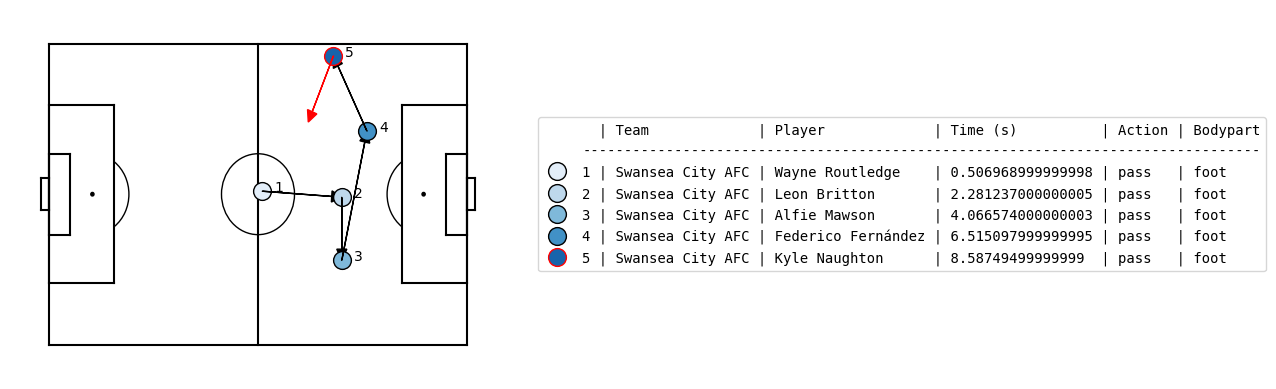

In [41]:
import matplotsoccer as mps

df_sample_beginning = spadl_events_england_df[:5]
df_sample_beginning = spadl.add_names(df_sample_beginning)
df_sample_beginning = df_sample_beginning.merge(teams_england_df).merge(players_df)
df_sample_beginning["action_name"] = df_sample_beginning.apply(lambda x : actiontypes[x["type_id"]], axis=1)
df_sample_beginning["bodypart_name"] = df_sample_beginning.apply(lambda x : bodyparts[x["bodypart_id"]], axis=1)

mps.actions(
    location=df_sample_beginning[["start_x", "start_y", "end_x", "end_y"]],
    team=df_sample_beginning.team_name,
    result=df_sample_beginning.result_id == 1,
    label=df_sample_beginning[["team_name", "player_name", "time_seconds", "action_name", "bodypart_name"]],
    labeltitle=["Team", "Player", "Time (s)", "Action", "Bodypart"],
    zoom=False
)